In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
data = pd.read_csv('master_subject_data.csv')
data

,subject,baseline diameter,post-occlusion diameter,fmd,class,arterial peak time,baseline shear,post-occlusion shear,shear flat increase,shear increase,...,Bowel Prog time,PI hx,1y hosp,AD,AD -ADFSCI,OH,OH ADFSCI,ADFSCI tot,notes,adjusted fmd
0,ASCI005,0.473380,0.514048,0.085910,sci,102.096656,421.186000,630.070,208.884000,0.495942,...,55,2.0,1.0,yes,14.0,yes,5.0,19.0,NaN,0.063509
1,ASCI006,0.281096,0.299526,0.065567,sci,72.260048,624.493333,753.570,129.076667,0.206690,...,52,1.0,1.0,yes,18.0,yes,13.0,31.0,NaN,0.048521
2,ASCI007,0.348563,0.388427,0.114365,sci,50.833787,618.280000,1261.600,643.320000,1.040499,...,90,2.0,0.0,yes,90.0,yes,0.0,90.0,NaN,0.084448
3,ASCI008,0.386901,0.428589,0.107748,sci,65.795438,490.977500,993.984,503.006500,1.024500,...,40,0.0,0.0,No,2.0,no,3.0,5.0,NaN,0.079574
4,ASCI009,0.381821,0.384390,0.006728,sci,85.843417,635.041667,1229.460,594.418333,0.936030,...,45,0.0,0.0,yes,13.0,yes,5.0,18.0,NaN,0.004968
5,ASCI010,0.325234,0.371801,0.143179,sci,79.521432,363.867500,827.108,463.240500,1.273102,...,90,0.0,0.0,yes,20.0,yes,23.0,43.0,NaN,0.105747
6,ASCI011,0.393493,0.421303,0.070676,sci,60.404403,847.565000,771.628,-75.937000,-0.089594,...,60,1.0,0.0,yes,7.0,yes,5.0,12.0,NaN,0.051915
7,ASCI012,0.310753,0.373397,0.201588,sci,54.875781,1087.577143,1560.320,472.742857,0.434675,...,30,0.0,0.0,no,5.0,no,2.0,7.0,NaN,0.148884
8,ASCI013,0.437899,0.465018,0.061932,sci,97.270583,410.953750,525.148,114.194250,0.277876,...,75,0.0,0.0,yes,35.0,yes,11.0,46.0,NaN,0.045848
9,ASCI014,0.328928,0.327331,-0.004856,sci,58.623520,1148.000000,1539.720,391.720000,0.341220,...,90,3.0,0.0,yes,91.0,yes,42.0,133.0,"had a lot of AD first year, 6 admissions for U...",-0.003587


# Cleaning and Formatting Data

In [305]:
ml_data = pd.DataFrame()

## Formatting AIS Scores

In [306]:
data['AIS']

0           A
1           A
2           A
3           A
4           A
5           A
6           B
7           D
8           A
9           B
10          A
11          B
12          B
13          C
14          B
15          A
16          A
17          A
18          B
19    control
20    control
21    control
22    control
23    control
24    control
25    control
26    control
27    control
28    control
29    control
30    control
31    control
32    control
Name: AIS, dtype: object

In [307]:
format_ais = lambda ais: ['control', 'D', 'C', 'B', 'A'].index(ais)

In [308]:
data['AIS'].apply(format_ais)

0     4
1     4
2     4
3     4
4     4
5     4
6     3
7     1
8     4
9     3
10    4
11    3
12    3
13    2
14    3
15    4
16    4
17    4
18    3
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
Name: AIS, dtype: int64

In [309]:
ml_data['ais'] = data['AIS'].apply(format_ais)

## Formatting NLI

In [310]:
data['NLI']

0      T3
1      C8
2      T3
3      T6
4      T2
5      C4
6      C6
7      T6
8      C3
9      T4
10     C6
11     C6
12     C7
13     C6
14     C6
15     T5
16     C4
17     C7
18     C5
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
Name: NLI, dtype: object

I want to make this a numerical category, T6 starting at 1 and counting up until C2

In [311]:
format_nli = lambda nli: [np.nan, 'T6', 'T5', 'T4', 'T3', 'T2', 'T1', 'C8', 'C7', 'C6', 'C5', 'C4', 'C3', 'C2', 'C1'].index(nli)

In [312]:
data['NLI'].apply(format_nli)

0      4
1      7
2      4
3      1
4      5
5     11
6      9
7      1
8     12
9      3
10     9
11     9
12     8
13     9
14     9
15     2
16    11
17     8
18    10
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
Name: NLI, dtype: int64

In [313]:
ml_data['nli'] = data['NLI'].apply(format_nli)

## Formatting TSI

In [314]:
data['TSI']

0     1.605479
1     4.093151
2     1.315068
3     1.282192
4     3.136986
5     4.306849
6     3.791781
7          NaN
8     1.315068
9     2.602740
10    2.589041
11    1.134247
12    1.679452
13    1.452055
14    2.698630
15    4.315068
16    7.854795
17    7.575342
18    8.931507
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
Name: TSI, dtype: float64

In [315]:
data['TSI'].fillna(0)

0     1.605479
1     4.093151
2     1.315068
3     1.282192
4     3.136986
5     4.306849
6     3.791781
7     0.000000
8     1.315068
9     2.602740
10    2.589041
11    1.134247
12    1.679452
13    1.452055
14    2.698630
15    4.315068
16    7.854795
17    7.575342
18    8.931507
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.000000
Name: TSI, dtype: float64

In [316]:
ml_data['tsi'] = data['TSI'].fillna(0)

## Formatting Age

In [317]:
data['Age']

0     25.900000
1     37.700000
2     18.564384
3     40.104110
4     26.956164
5     37.764384
6     34.865753
7     31.865753
8     42.435616
9     32.893151
10    27.487671
11    32.079452
12    25.616438
13    22.589041
14    43.210959
15    25.432877
16    31.112329
17    28.882192
18    28.145205
19    29.484932
20    27.257534
21    24.967123
22    23.542466
23    23.761644
24    29.761644
25    23.432877
26    26.419178
27    24.298630
28    25.035616
29    30.134247
30    48.989041
31    38.032877
32    36.295890
Name: Age, dtype: float64

In [318]:
ml_data['age'] = data['Age']

## Formatting ADFSCI

In [319]:
data['ADFSCI tot']

0      19.0
1      31.0
2      90.0
3       5.0
4      18.0
5      43.0
6      12.0
7       7.0
8      46.0
9     133.0
10    151.0
11     61.0
12     37.0
13     16.0
14      5.0
15    196.0
16    125.0
17     41.0
18     41.0
19      0.0
20      9.0
21     14.0
22      7.0
23     28.0
24     10.0
25      3.0
26     10.0
27     26.0
28      9.0
29      4.0
30      0.0
31      9.0
32     42.0
Name: ADFSCI tot, dtype: float64

In [320]:
ml_data['adfsci'] = data['ADFSCI tot']

# Preview, Scale, Stratify, and Split ML-Data for Training and Testing

In [321]:
ml_data['fmd'] = data['fmd']

In [322]:
ml_data

,ais,nli,tsi,age,adfsci,fmd
0,4,4,1.605479,25.900000,19.0,0.085910
1,4,7,4.093151,37.700000,31.0,0.065567
2,4,4,1.315068,18.564384,90.0,0.114365
3,4,1,1.282192,40.104110,5.0,0.107748
4,4,5,3.136986,26.956164,18.0,0.006728
5,4,11,4.306849,37.764384,43.0,0.143179
6,3,9,3.791781,34.865753,12.0,0.070676
7,1,1,0.000000,31.865753,7.0,0.201588
8,4,12,1.315068,42.435616,46.0,0.061932
9,3,3,2.602740,32.893151,133.0,-0.004856


In [323]:
X = ml_data.iloc[:, 3:-1]
X

,age,adfsci
0,25.900000,19.0
1,37.700000,31.0
2,18.564384,90.0
3,40.104110,5.0
4,26.956164,18.0
5,37.764384,43.0
6,34.865753,12.0
7,31.865753,7.0
8,42.435616,46.0
9,32.893151,133.0


In [324]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
scaled_x = scaler.transform(X)
scaled_x

array([[-0.66688914, -0.39757195],
       [ 1.06067905, -0.14404781],
       [-1.74085334,  1.10244588],
       [ 1.41265051, -0.69335011],
       [-0.51226236, -0.41869896],
       [ 1.07010507,  0.10947633],
       [ 0.64573378, -0.54546103],
       [ 0.20652153, -0.65109609],
       [ 1.75399263,  0.17285737],
       [ 0.35693668,  2.01090738],
       [-0.43444759,  2.39119359],
       [ 0.23780788,  0.48976254],
       [-0.70840372, -0.01728574],
       [-1.15162704, -0.46095298],
       [ 1.86750594, -0.69335011],
       [-0.73527789,  3.34190912],
       [ 0.09621708,  1.84189129],
       [-0.23028408,  0.06722231],
       [-0.33818189,  0.06722231],
       [-0.14204052, -0.79898517],
       [-0.46814058, -0.60884206],
       [-0.8034661 , -0.50320701],
       [-1.01204178, -0.65109609],
       [-0.97995321, -0.20742884],
       [-0.10152871, -0.58771505],
       [-1.02808606, -0.73560413],
       [-0.59087935, -0.58771505],
       [-0.90133622, -0.24968287],
       [-0.79343842,

In [325]:
ml_data['age'] = scaled_x[:,0]
ml_data['adfsci'] = scaled_x[:,1]
ml_data[ml_data['fmd'] < 0] = 0

In [326]:
X = ml_data.iloc[:, :-1]
y = ml_data.iloc[:, -1].to_numpy()

In [327]:
from sklearn.preprocessing import normalize
X = normalize(X, axis = 1)
X

array([[ 0.67438794,  0.67438794,  0.270679  , -0.1124355 , -0.06702943],
       [ 0.43932264,  0.76881462,  0.44955344,  0.11649508, -0.01582087],
       [ 0.64909614,  0.64909614,  0.21340147, -0.2824953 ,  0.17889834],
       [ 0.87038145,  0.21759536,  0.27899898,  0.3073862 , -0.15086977],
       [ 0.55858946,  0.69823683,  0.43807187, -0.07153609, -0.05847021],
       [ 0.31953401,  0.87871854,  0.34404621,  0.08548374,  0.00874535],
       [ 0.2926417 ,  0.87792511,  0.36987773,  0.06298954, -0.05320821],
       [ 0.63672608,  0.63672608,  0.        ,  0.13149764, -0.41456986],
       [ 0.31155466,  0.93466399,  0.10242893,  0.13661615,  0.01346363],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.38206348,  0.85964283,  0.24729451, -0.04149664,  0.22839694],
       [ 0.31348299,  0.94044896,  0.11852233,  0.02484957,  0.05117741],
       [ 0.34339535,  0.91572093,  0.19223868, -0.08108751, -0.00197861],
       [ 0.21242103,  0.95589466,  0.1

In [328]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X = pca.fit_transform(X)

In [329]:
y *= 100
y

array([ 8.59096704,  6.55669191, 11.43647573, 10.77479178,  0.67276264,
       14.31793898,  7.06756821, 20.15884095,  6.19318035,  0.        ,
        6.36301458,  5.40432404,  7.29580459,  5.30574144, 13.09480413,
        2.87199932,  0.        ,  0.        ,  0.95187848, 17.64703826,
       27.28538437, 15.601544  , 21.4918468 , 26.19619608,  3.09979652,
       11.15436418,  8.16902496, 22.04461873, 12.45776972, 27.3262077 ,
       12.81982351,  8.73619375, 16.25738559])

In [330]:
data = np.column_stack([X,y])

In [331]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size= 0.25, random_state= 42, shuffle=True)
train

array([[ 4.06780024e-01, -3.21673569e-01, -9.85496046e-02,
         2.59467571e-01, -9.26502949e-02,  8.59096704e+00],
       [ 4.49042240e-01, -3.07389852e-01, -9.04345974e-02,
         1.96182007e-01,  1.01471881e-01,  6.72762642e-01],
       [-9.17966784e-02,  2.81270089e-01,  4.06702968e-01,
        -1.02723390e-01, -5.49971029e-02,  0.00000000e+00],
       [ 5.82160666e-01, -2.14037441e-01, -1.23317270e-01,
        -1.19891867e-01,  8.36958656e-02,  1.43179390e+01],
       [ 3.96846550e-01, -3.37299440e-01, -1.80478535e-01,
        -2.86617854e-01, -5.54880495e-02,  5.30574144e+00],
       [ 5.49206816e-01, -2.58193138e-01, -1.20629759e-01,
        -2.20717973e-01, -1.33044653e-01,  5.40432404e+00],
       [-6.69549444e-01,  4.05984739e-01, -3.73915147e-01,
         5.92143056e-02,  6.77202158e-02,  3.09979652e+00],
       [ 5.89021297e-01, -1.79070611e-01, -9.90807700e-02,
         6.16755730e-02,  1.49279956e-01,  6.55669191e+00],
       [ 3.88486394e-01, -4.90253191e-01,  1.353

In [332]:
x_train = train[:,:-1]
y_train = train[:, -1]

x_test = test[:, :-1]
y_test = test[:, -1]

# Support Vector Regression

In [333]:
from sklearn.svm import SVR

svr = SVR()

## Grid Search

In [334]:
param_grid = {"C" : np.arange(0.1, 10, 0.1),
              "epsilon": np.arange(0,3, 0.01)}

In [335]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svr, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7...
       2.31, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41,
       2.42, 2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52,
       2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63,
       2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74,
       2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85,
       2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96,
       2.97, 2.98, 2.99]),
                         'kernel': ['rbf']})

In [336]:
y_pred = clf.predict(x_test)

In [337]:
clf.best_params_

{'C': 2.5000000000000004, 'epsilon': 1.6300000000000001, 'kernel': 'rbf'}

In [338]:
clf.best_score_

-0.5386817026252855

In [339]:
best = clf.best_estimator_

In [346]:
from sklearn.metrics import explained_variance_score, r2_score
explained_variance_score(y_test, y_pred)

0.3315962969909194

In [347]:
r2_score(y_test, y_pred)

-0.32654902598134994

In [341]:
clf.score(x_test, y_test)

-0.32654902598134994

In [342]:
d = pd.DataFrame()
d['true'] = y_test
d['pred'] = y_pred
d

,true,pred
0,8.736194,14.019985
1,2.871999,10.515036
2,8.169025,15.259978
3,0.000000,11.107821
4,6.193180,8.988255
5,0.000000,11.107821
6,17.647038,13.909974
7,15.601544,16.018352
8,7.295805,8.170670


<Axes: >

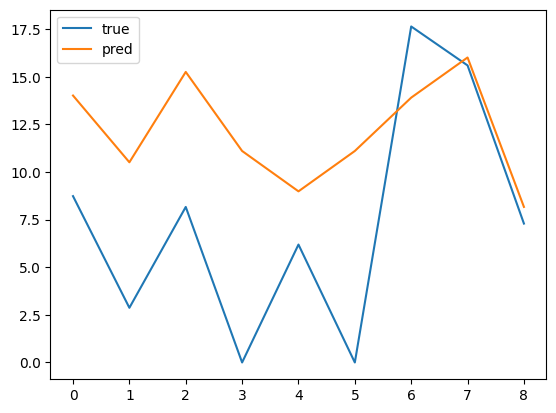

In [343]:
d.reset_index(drop = True).plot()

In [344]:
import pickle

with open('best_svr.pkl', 'wb') as file:
    pickle.dump(clf.best_estimator_, file)
